In [1]:
import torch
import numpy as np
import matplotlib.pylab as plt
from IPython.display import clear_output
import torch.nn as nn 
import torch.optim as optim

import antidistil
import pipeline
import consts
from importlib import reload
import plot
import json
reload(plot)
reload(antidistil)
reload(pipeline)
reload(consts)
plot.prepare_for_plots()

Using cuda device
Using cuda device


<Figure size 864x720 with 0 Axes>

In [2]:
train_dataloader, test_dataloader = pipeline.get_data()

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [3]:
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

for i in range(consts.num_repeats):
    clear_output()
    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)

    teacher = pipeline.make_teacher_model()
    teacher.load_state_dict(torch.load(pipeline.get_path()+f'/teacher_5cl_{i}.pt'))
    model = antidistil.make_student_model()

    mask = torch.tensor([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=torch.float).to(consts.device)
    
    loss_fn = antidistil.altidistill_loss
    optimizer = optim.Adam(model.parameters(), lr=consts.student_5_antidistil_learning_rate)
    scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.85)

    lambdas = [1, 1, 1, 0]
    
    for epoch in range(consts.student_5_antidistil_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.antidistil_loop(teacher, model, lambdas, mask, train_dataloader, 
                                 loss_fn, optimizer, scheduler, noise_dist='uniform', noise_eps=1e-1)

    optimizer = optim.Adam(model.parameters(), lr=consts.student_5_learning_rate)    

    mask = torch.ones(10).to(consts.device)

    loss_fn = nn.CrossEntropyLoss()

    for epoch in range(consts.student_5_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model, history, mask, train_dataloader, loss_fn, optimizer)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)

    pipeline.test_loop_fsgm(model, history, mask, test_dataloader, loss_fn, consts.fsgm_eps)
    pipeline.test_loop_noise(model, history, mask, test_dataloader, consts.noise_eps)
    torch.save(model.state_dict(), pipeline.get_path()+f'/lambdas_sched_{i}.pt')

Model 10
-------------------------------
-------------------------------
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1
-------------------------------


Train Loss: 48.452936911075675
Train Acc: 0.8750666666666667
Epoch 2
-------------------------------


Train Loss: 6.3288100777788365
Train Acc: 0.9435
Epoch 3
-------------------------------


Train Loss: 0.49879867833979585
Train Acc: 0.9474
Epoch 4
-------------------------------


Train Loss: 0.3587558025375326
Train Acc: 0.9484666666666667
Epoch 5
-------------------------------


Train Loss: 0.339103062672818
Train Acc: 0.9492
Epoch 6
-------------------------------


Train Loss: 0.3242539108433622
Train Acc: 0.9495666666666667
Epoch 7
-------------------------------


Train Loss: 0.3130223170239875
Train Acc: 0.9507
Epoch 8
-------------------------------


Train Loss: 0.30274087165264374
Train Acc: 0.9507666666666666
Epoch 9
-------------------------------


Train Loss: 0.2948876697332301
Train Acc: 0.9505
Epoch 10
-------------------------------


Train Loss: 0.2873590226503129
Train Acc: 0.9513333333333334
Epoch 11
-------------------------------


Train Loss: 0.28034388169329216
Train Acc: 0.9517666666666666
Epoch 12
-------------------------------


Train Loss: 0.2705865156460316
Train Acc: 0.9525666666666667
Epoch 13
-------------------------------


Train Loss: 0.26533736659491314
Train Acc: 0.9526333333333333
Epoch 14
-------------------------------


Train Loss: 0.25980517318908203
Train Acc: 0.9533
Epoch 15
-------------------------------


Train Loss: 0.2572511777598807
Train Acc: 0.9539333333333333
Epoch 1
-------------------------------


Validation accuracy: 83.7%, Validation loss: 0.470311 

Epoch 2
-------------------------------


Validation accuracy: 85.6%, Validation loss: 0.407945 

Epoch 3
-------------------------------


Validation accuracy: 86.5%, Validation loss: 0.381429 

Epoch 4
-------------------------------


Validation accuracy: 87.0%, Validation loss: 0.367768 

Epoch 5
-------------------------------


Validation accuracy: 87.1%, Validation loss: 0.363086 

Epoch 6
-------------------------------


Validation accuracy: 87.3%, Validation loss: 0.358935 

Epoch 7
-------------------------------


Validation accuracy: 87.3%, Validation loss: 0.357004 

Epoch 8
-------------------------------


Validation accuracy: 87.7%, Validation loss: 0.354127 

Epoch 9
-------------------------------


Validation accuracy: 87.5%, Validation loss: 0.353059 

Epoch 10
-------------------------------


Validation accuracy: 87.8%, Validation loss: 0.353946 

Epoch 11
-------------------------------


Validation accuracy: 88.0%, Validation loss: 0.355059 

Epoch 12
-------------------------------


Validation accuracy: 88.0%, Validation loss: 0.358628 

Epoch 13
-------------------------------


Validation accuracy: 88.4%, Validation loss: 0.359390 

Epoch 14
-------------------------------


Validation accuracy: 88.2%, Validation loss: 0.361154 

Epoch 15
-------------------------------


Validation accuracy: 88.3%, Validation loss: 0.367808 

Epoch 16
-------------------------------


Validation accuracy: 88.2%, Validation loss: 0.378291 

Epoch 17
-------------------------------


Validation accuracy: 87.7%, Validation loss: 0.393973 

Epoch 18
-------------------------------


Validation accuracy: 87.5%, Validation loss: 0.403465 

Epoch 19
-------------------------------


Validation accuracy: 87.8%, Validation loss: 0.402600 

Epoch 20
-------------------------------


Validation accuracy: 87.8%, Validation loss: 0.400835 

Epoch 21
-------------------------------


Validation accuracy: 87.9%, Validation loss: 0.410714 

Epoch 22
-------------------------------


Validation accuracy: 88.1%, Validation loss: 0.413059 

Epoch 23
-------------------------------


Validation accuracy: 88.0%, Validation loss: 0.422750 

Epoch 24
-------------------------------


Validation accuracy: 88.3%, Validation loss: 0.418287 

Epoch 25
-------------------------------


Validation accuracy: 88.2%, Validation loss: 0.427557 

Epoch 26
-------------------------------


Validation accuracy: 88.2%, Validation loss: 0.441212 

Epoch 27
-------------------------------


Validation accuracy: 88.2%, Validation loss: 0.454264 

Epoch 28
-------------------------------


Validation accuracy: 87.9%, Validation loss: 0.466902 

Epoch 29
-------------------------------


Validation accuracy: 87.8%, Validation loss: 0.485876 

Epoch 30
-------------------------------


Validation accuracy: 88.1%, Validation loss: 0.481491 



FSGM Accuracy [0.8808, 0.8447, 0.8061, 0.7675, 0.7254, 0.6836, 0.6468, 0.612, 0.5761, 0.5432]


Noise Accuracy [0.8808, 0.8787, 0.8709, 0.8664, 0.8557, 0.8462, 0.8239, 0.8014, 0.7807, 0.7576]
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


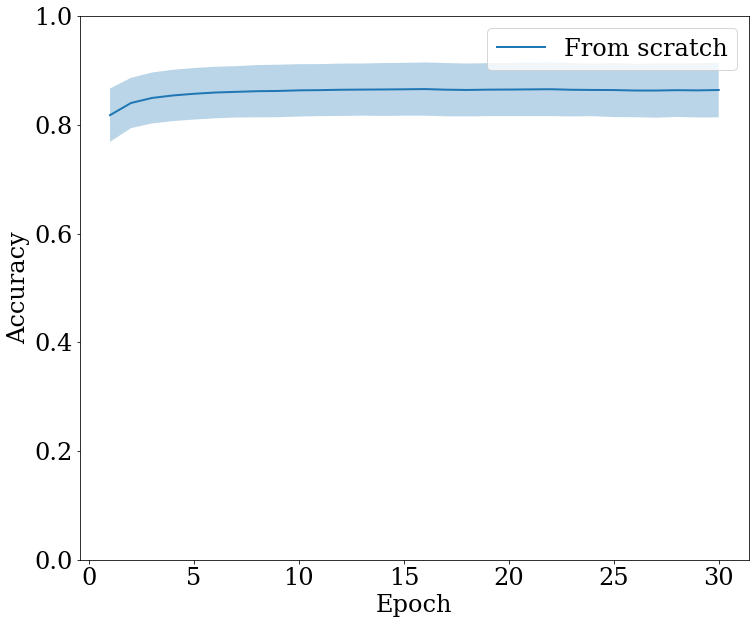

In [4]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], np.arange(1, consts.student_5_training_epochs + 1),
                   ['From scratch'], 'val_acc', 
                    'Epoch', 'Accuracy')

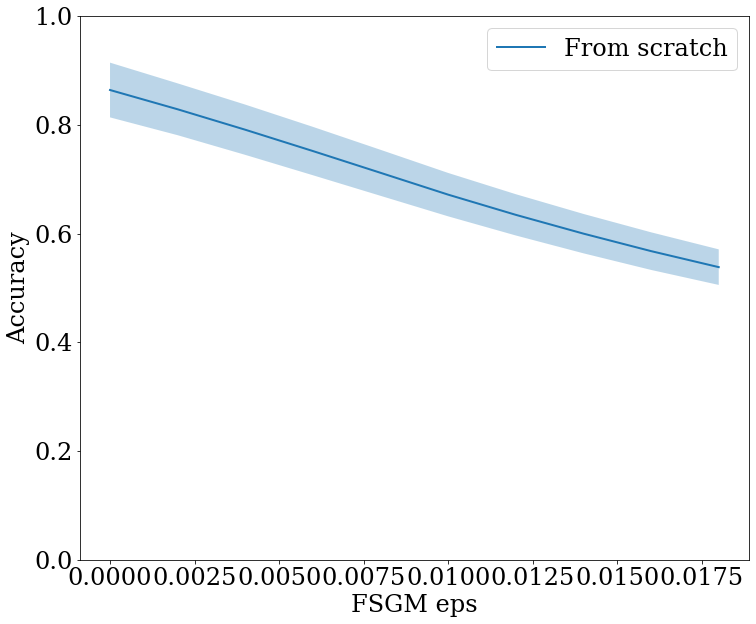

In [5]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'fsgm_noise_acc', 
                    'FSGM eps', 'Accuracy')

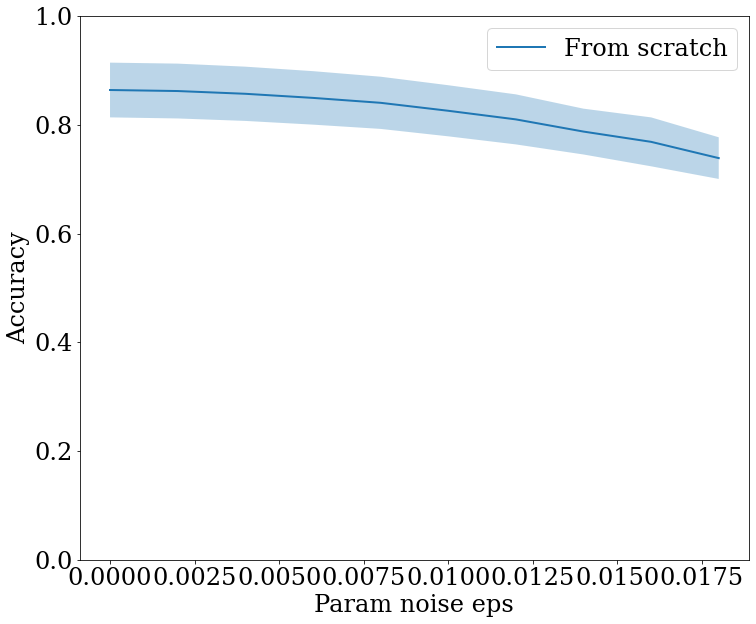

In [6]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'param_noise_acc', 
                    'Param noise eps', 'Accuracy')

In [7]:
with open(pipeline.get_path()+'/history_antidistil.json', 'w') as out:
    out.write(json.dumps(history))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
